# Projeto Final: Microdados ENEM 2023 – Nordeste

Proposição 01:
- Calcular as médias por estado em relação a cada uma das provas do ENEM:
    - Ciências da Natureza
    - Ciências Humanas
    - Linguagens e Códigos
    - Matemática
- Plotar os resultados
- Pergunta: *Qual estado teve a maior e a menor média por prova?*

Proposição 02:
- Calcular a **moda** da faixa da renda dos inscritos para cada estado
- Corelacionar as médias das provas (calculadas anteriormente) com o resultado da moda de cada estado
- Pergunta: *Quanto maior a faixa de renda, maior a média das provas?*

Proposição 03:
- Filtrar o grau de escolaridade dos pais
- Pergunta: *Quanto maior o grau de escolaridade, maior a renda?*

## Setup

### Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### Carregar CSV

Nota: Cada linha do `df` corresponde a um inscrito do ENEM.

In [2]:
microdados_df = pd.read_csv(
    filepath_or_buffer="../../datasets/microdados-enem-2023-nordeste.csv",
    sep=";",
    decimal=",",
    encoding="utf-8",
    encoding_errors="ignore"
)

microdados_df.head()

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,210060214087,2023,17 anos,Feminino,Solteiro(a),Parda,Brasileiro(a),Estou cursando e concluirei o Ensino Médio em ...,Não informado,Pública,...,Nao,Nao,Nao,"Sim, um",Nao,Nao,"Sim, tres",Nao,Nao,Sim
1,210059980948,2023,18 anos,Feminino,Solteiro(a),Parda,Brasileiro(a),Estou cursando e concluirei o Ensino Médio em ...,Não informado,Pública,...,Nao,Nao,Nao,"Sim, um",Nao,Nao,"Sim, um",Nao,Nao,Nao
2,210059085130,2023,23 anos,Maculino,Solteiro(a),Parda,Brasileiro(a),Já concluí o Ensino Médio,2018,Não respondeu,...,"Sim, um",Nao,Sim,"Sim, um",Nao,Nao,"Sim, quatro ou mais",Nao,"Sim, um",Sim
3,210059980942,2023,22 anos,Feminino,Solteiro(a),Parda,Brasileiro(a),Já concluí o Ensino Médio,2019,Não respondeu,...,Nao,Nao,Nao,"Sim, um",Nao,Nao,"Sim, tres",Nao,"Sim, um",Sim
4,210058061534,2023,19 anos,Feminino,Solteiro(a),Branca,Brasileiro(a),Estou cursando e concluirei o Ensino Médio em ...,Não informado,Pública,...,Nao,Nao,Nao,"Sim, um",Nao,Nao,"Sim, tres",Sim,Nao,Sim


## Tratamento dos dados

### 1. Selecionar somente as colunas necessárias

Em um novo `df`, selecionar as seguintes colunas:
- `SG_UF_PROVA` (sigla do estado onde o inscrito fez a prova)
- `NU_NOTA_CN` (nota da prova de ciências da natureza)
- `NU_NOTA_CH` (nota da prova de ciências humanas)
- `NU_NOTA_LC` (nota da prova de linguagens e códigos)
- `NU_NOTA_MT` (nota da prova de matemática)
- `Q001` (faixa do grau de escolaridade do pai)
- `Q002` (faixa do grau de escolaridade da mãe)
- `Q006` (faixa da renda familiar)

In [3]:
notas_estados_microdados_df = microdados_df[[
    "SG_UF_ESC",
    "NU_NOTA_CN",
    "NU_NOTA_CH",
    "NU_NOTA_LC",
    "NU_NOTA_MT",
    "Q001",
    "Q002",
    "Q006"
]]

notas_estados_microdados_df.head()

,SG_UF_ESC,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,Q001,Q002,Q006
0,CE,459.0,508.5,507.2,466.7,Completou a 8a serie/9o ano do ensino fundamen...,Completou a 8a serie/9o ano do ensino fundamen...,"De R$ 1.320,01 ate R$ 1.980,00."
1,CE,402.5,379.2,446.9,338.3,Nao completou a 4a serie/5o ano do ensino fund...,Nao completou a 4a serie/5o ano do ensino fund...,"Ate R$ 1.320,00"
2,NaN,644.9,620.2,626.9,736.3,"Completou a Faculdade, mas nao completou a Pos...","Completou a 4a serie/5o ano, mas nao completou...","Ate R$ 1.320,00"
3,NaN,510.8,313.4,388.5,415.6,Nao completou a 4a serie/5o ano do ensino fund...,Nao completou a 4a serie/5o ano do ensino fund...,Nenhuma Renda
4,PA,515.7,553.1,544.4,437.0,"Completou o Ensino Medio, mas nao completou a ...","Completou o Ensino Medio, mas nao completou a ...","Ate R$ 1.320,00"


### 2. Remover linhas com valor `NaN`

In [4]:
notas_estados_microdados_df = notas_estados_microdados_df.dropna(axis=0, how="any")
notas_estados_microdados_df.head()

,SG_UF_ESC,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,Q001,Q002,Q006
0,CE,459.0,508.5,507.2,466.7,Completou a 8a serie/9o ano do ensino fundamen...,Completou a 8a serie/9o ano do ensino fundamen...,"De R$ 1.320,01 ate R$ 1.980,00."
1,CE,402.5,379.2,446.9,338.3,Nao completou a 4a serie/5o ano do ensino fund...,Nao completou a 4a serie/5o ano do ensino fund...,"Ate R$ 1.320,00"
4,PA,515.7,553.1,544.4,437.0,"Completou o Ensino Medio, mas nao completou a ...","Completou o Ensino Medio, mas nao completou a ...","Ate R$ 1.320,00"
11,CE,615.0,620.5,534.0,645.1,Nao sei,"Completou o Ensino Medio, mas nao completou a ...","Ate R$ 1.320,00"
16,BA,447.9,568.2,560.8,639.0,"Completou a 4a serie/5o ano, mas nao completou...","Completou a 4a serie/5o ano, mas nao completou...","Ate R$ 1.320,00"


## Proposição 01

- Calcular as médias por estado em relação a cada uma das provas do ENEM:
    - Ciências da Natureza
    - Ciências Humanas
    - Linguagens e Códigos
    - Matemática
- Plotar os resultados
- Pergunta: *Qual estado teve a maior e a menor média por prova?*

### Prova: Ciências da Natureza

Calcular média por estado

In [5]:
media_prova_cn_por_estado = pd.DataFrame(
    notas_estados_microdados_df.groupby("SG_UF_ESC", as_index=False)["NU_NOTA_CN"].mean()
)

media_prova_cn_por_estado

,SG_UF_ESC,NU_NOTA_CN
0,AL,476.888444
1,AM,468.600000
2,AP,505.450000
3,BA,497.872167
4,CE,464.978441
5,DF,503.620000
6,ES,465.650000
7,GO,484.950000
8,MA,463.808960
9,MG,470.380392


Gerar gráfico de distribuição

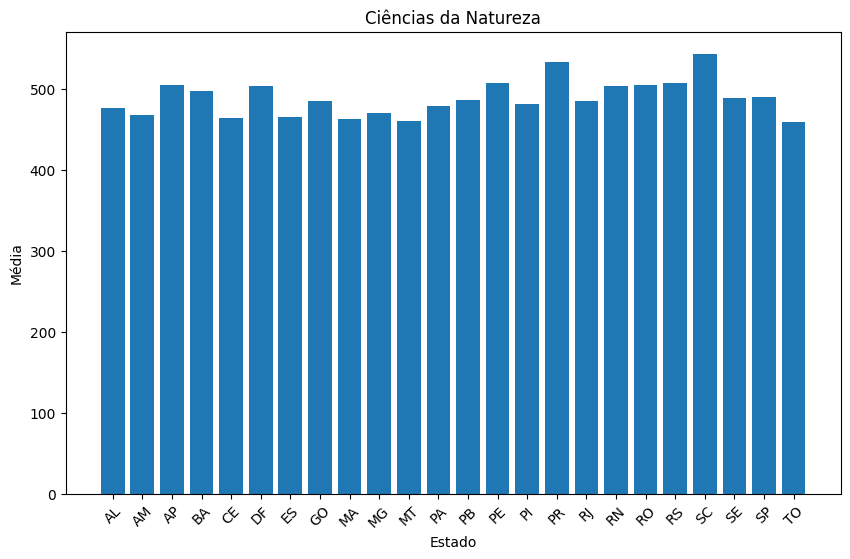

In [6]:
plt.figure(figsize=(10,6))
plt.bar(media_prova_cn_por_estado["SG_UF_ESC"], media_prova_cn_por_estado["NU_NOTA_CN"])
plt.xlabel("Estado")
plt.ylabel("Média")
plt.title("Ciências da Natureza")
plt.xticks(rotation=45)
plt.show()

Estados com maior e menor média

In [7]:
maior_media_cn = max(media_prova_cn_por_estado["NU_NOTA_CN"])
uf_maior_media_cn = media_prova_cn_por_estado[media_prova_cn_por_estado["NU_NOTA_CN"] == maior_media_cn].iloc[0]["SG_UF_ESC"]

menor_media_cn = min(media_prova_cn_por_estado["NU_NOTA_CN"])
uf_menor_media_cn = media_prova_cn_por_estado[media_prova_cn_por_estado["NU_NOTA_CN"] == menor_media_cn].iloc[0]["SG_UF_ESC"]

print("Maior Média:", maior_media_cn)
print("UF:", uf_maior_media_cn)

print("\nMenor Média:", menor_media_cn)
print("UF:", uf_menor_media_cn)

Maior Média: 543.925
UF: SC

Menor Média: 459.14025974025975
UF: TO


### Prova: Ciências Humanas

Calcular média por estado

In [8]:
media_prova_ch_por_estado = pd.DataFrame(
    notas_estados_microdados_df.groupby("SG_UF_ESC", as_index=False)["NU_NOTA_CH"].mean()
)

media_prova_ch_por_estado

,SG_UF_ESC,NU_NOTA_CH
0,AL,502.483859
1,AM,466.831250
2,AP,480.150000
3,BA,527.560874
4,CE,488.767197
5,DF,537.650000
6,ES,507.050000
7,GO,527.116667
8,MA,489.879882
9,MG,493.420588


Plotar gráfico de distribuição

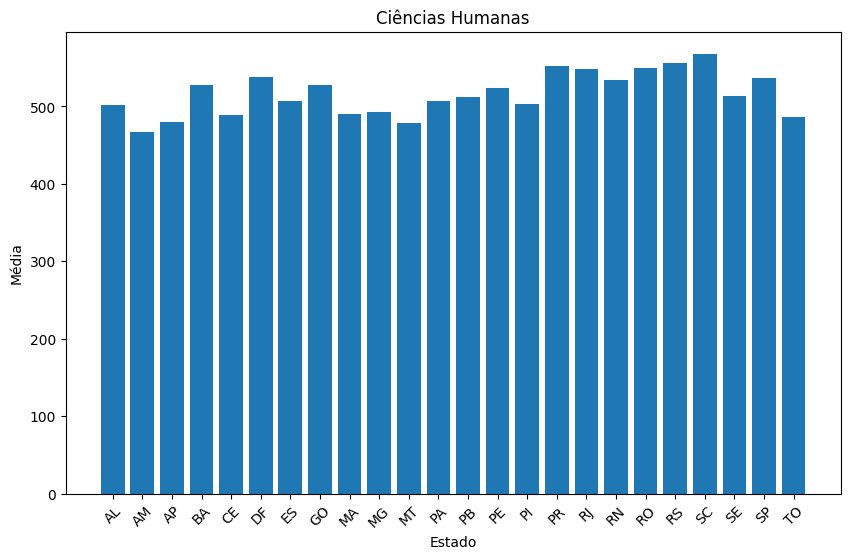

In [9]:
plt.figure(figsize=(10,6))
plt.bar(media_prova_ch_por_estado["SG_UF_ESC"], media_prova_ch_por_estado["NU_NOTA_CH"])
plt.xlabel("Estado")
plt.ylabel("Média")
plt.title("Ciências Humanas")
plt.xticks(rotation=45)
plt.show()

Estados com maior e menor média

In [10]:
maior_media_ch = max(media_prova_ch_por_estado["NU_NOTA_CH"])
uf_maior_media_cn = media_prova_ch_por_estado[media_prova_ch_por_estado["NU_NOTA_CH"] == maior_media_ch].iloc[0]["SG_UF_ESC"]

menor_media_ch = min(media_prova_ch_por_estado["NU_NOTA_CH"])
uf_menor_media_ch = media_prova_ch_por_estado[media_prova_ch_por_estado["NU_NOTA_CH"] == menor_media_ch].iloc[0]["SG_UF_ESC"]

print("Maior Média:", maior_media_ch)
print("UF:", uf_maior_media_cn)

print("\nMenor Média:", menor_media_ch)
print("UF:", uf_menor_media_ch)

Maior Média: 568.0749999999999
UF: SC

Menor Média: 466.83125
UF: AM


### Prova: Liguagens e Códigos

Calcular média por estado

In [11]:
media_prova_lc_por_estado = pd.DataFrame(
    notas_estados_microdados_df.groupby("SG_UF_ESC", as_index=False)["NU_NOTA_LC"].mean()
)

media_prova_lc_por_estado

,SG_UF_ESC,NU_NOTA_LC
0,AL,497.590736
1,AM,464.718750
2,AP,510.500000
3,BA,518.661256
4,CE,489.681646
5,DF,515.700000
6,ES,530.575000
7,GO,507.205556
8,MA,485.499591
9,MG,489.222549


Plotar gráfico de distribuição (barras)

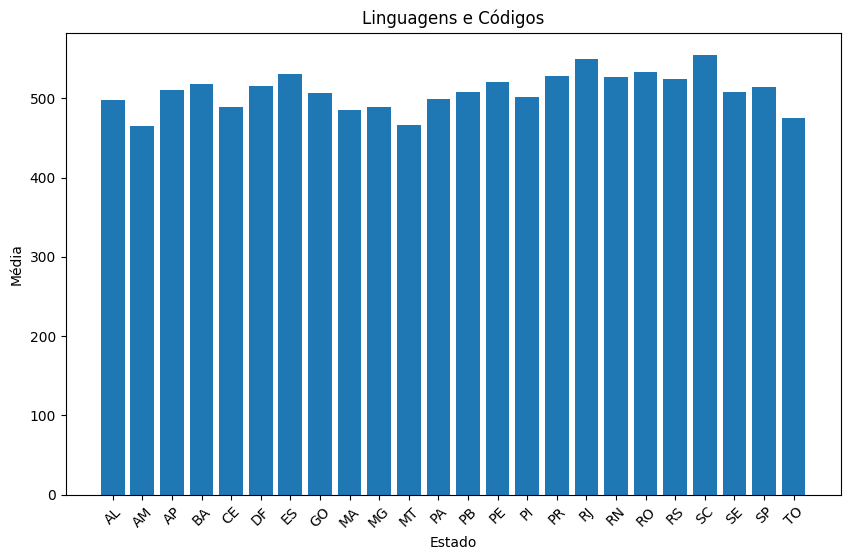

In [12]:
plt.figure(figsize=(10,6))
plt.bar(media_prova_lc_por_estado["SG_UF_ESC"], media_prova_lc_por_estado["NU_NOTA_LC"])
plt.xlabel("Estado")
plt.ylabel("Média")
plt.title("Linguagens e Códigos")
plt.xticks(rotation=45)
plt.show()

Estados com maior e menor média

In [13]:
maior_media_lc = max(media_prova_lc_por_estado["NU_NOTA_LC"])
uf_maior_media_lc = media_prova_lc_por_estado[media_prova_lc_por_estado["NU_NOTA_LC"] == maior_media_lc].iloc[0]["SG_UF_ESC"]

menor_media_lc = min(media_prova_lc_por_estado["NU_NOTA_LC"])
uf_menor_media_lc = media_prova_lc_por_estado[media_prova_lc_por_estado["NU_NOTA_LC"] == menor_media_lc].iloc[0]["SG_UF_ESC"]

print("Maior Média:", maior_media_lc)
print("UF:", uf_maior_media_lc)

print("\nMenor Média:", menor_media_lc)
print("UF:", uf_menor_media_lc)

Maior Média: 555.0
UF: SC

Menor Média: 464.71875
UF: AM


### Prova: Matemática

Calcular média por estado

In [14]:
media_prova_mt_por_estado = pd.DataFrame(
    notas_estados_microdados_df.groupby("SG_UF_ESC", as_index=False)["NU_NOTA_MT"].mean()
)

media_prova_mt_por_estado

,SG_UF_ESC,NU_NOTA_MT
0,AL,513.064702
1,AM,476.918750
2,AP,471.450000
3,BA,540.848016
4,CE,498.874168
5,DF,554.320000
6,ES,531.737500
7,GO,560.500000
8,MA,486.734986
9,MG,505.300000


Plotar gráfico de distribuição (barras)

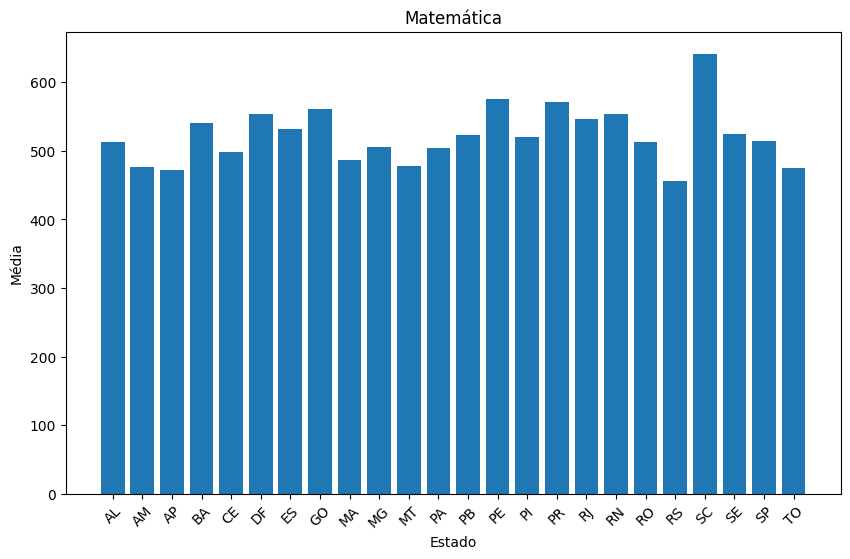

In [15]:
plt.figure(figsize=(10,6))
plt.bar(media_prova_mt_por_estado["SG_UF_ESC"], media_prova_mt_por_estado["NU_NOTA_MT"])
plt.xlabel("Estado")
plt.ylabel("Média")
plt.title("Matemática")
plt.xticks(rotation=45)
plt.show()

Estados com maior e menor média

In [16]:
maior_media_mt = max(media_prova_mt_por_estado["NU_NOTA_MT"])
uf_maior_media_mt = media_prova_mt_por_estado[media_prova_mt_por_estado["NU_NOTA_MT"] == maior_media_mt].iloc[0]["SG_UF_ESC"]

menor_media_mt = min(media_prova_mt_por_estado["NU_NOTA_MT"])
uf_menor_media_mt = media_prova_mt_por_estado[media_prova_mt_por_estado["NU_NOTA_MT"] == menor_media_mt].iloc[0]["SG_UF_ESC"]

print("Maior Média:", maior_media_mt)
print("UF:", uf_maior_media_mt)

print("\nMenor Média:", menor_media_mt)
print("UF:", uf_menor_media_mt)

Maior Média: 641.75
UF: SC

Menor Média: 456.65
UF: RS


## Proposição 02

- Calcular a **moda** da faixa da renda dos inscritos para cada estado
- Corelacionar as médias das provas (calculadas anteriormente) com o resultado da moda de cada estado
- Pergunta: *Quanto maior a faixa de renda, maior a média das provas?*

<br/>

Selecionar somente as colunas `SG_UF_ESC`, `Q006` e agrupar por `SG_UF_ESC`

In [17]:
faixa_renda_estado_agrupado = notas_estados_microdados_df[["SG_UF_ESC", "Q006"]].groupby("SG_UF_ESC")

Em um novo `df`, unificar a moda com as médias de cada prova (arredondadas com 2 casas decimais), por estado

In [19]:
faixa_renda_media_provas_unificado = {
    "uf": [],
    "moda_faixa_renda": [],
    "media_ciencias_natureza": [],
    "media_ciencias_humanas": [],
    "media_linguagens_codigos": [],
    "media_matematica": []
}

for uf, grupo in faixa_renda_estado_agrupado:
    faixa_renda_media_provas_unificado["uf"].append(uf)

    faixa_renda_media_provas_unificado["moda_faixa_renda"].append(
        grupo["Q006"].mode()[0]
    )

    faixa_renda_media_provas_unificado["media_ciencias_natureza"].append(
        round(media_prova_cn_por_estado[media_prova_cn_por_estado["SG_UF_ESC"] == uf].iloc[0]["NU_NOTA_CN"], 2)
    )

    faixa_renda_media_provas_unificado["media_ciencias_humanas"].append(
        round(media_prova_ch_por_estado[media_prova_ch_por_estado["SG_UF_ESC"] == uf].iloc[0]["NU_NOTA_CH"], 2)
    )

    faixa_renda_media_provas_unificado["media_linguagens_codigos"].append(
        round(media_prova_lc_por_estado[media_prova_lc_por_estado["SG_UF_ESC"] == uf].iloc[0]["NU_NOTA_LC"], 2)
    )
    
    faixa_renda_media_provas_unificado["media_matematica"].append(
        round(media_prova_mt_por_estado[media_prova_mt_por_estado["SG_UF_ESC"] == uf].iloc[0]["NU_NOTA_MT"], 2)
    )

faixa_renda_media_provas_unificado_df = pd.DataFrame(faixa_renda_media_provas_unificado)
faixa_renda_media_provas_unificado_df

,uf,moda_faixa_renda,media_ciencias_natureza,media_ciencias_humanas,media_linguagens_codigos,media_matematica
0,AL,"Ate R$ 1.320,00",476.89,502.48,497.59,513.06
1,AM,"Ate R$ 1.320,00",468.60,466.83,464.72,476.92
2,AP,"De R$ 2.640,01 ate R$ 3.300,00.",505.45,480.15,510.50,471.45
3,BA,"Ate R$ 1.320,00",497.87,527.56,518.66,540.85
4,CE,"Ate R$ 1.320,00",464.98,488.77,489.68,498.87
5,DF,"Ate R$ 1.320,00",503.62,537.65,515.70,554.32
6,ES,"De R$ 1.980,01 ate R$ 2.640,00.",465.65,507.05,530.58,531.74
7,GO,"De R$ 1.320,01 ate R$ 1.980,00.",484.95,527.12,507.21,560.50
8,MA,"Ate R$ 1.320,00",463.81,489.88,485.50,486.73
9,MG,"Ate R$ 1.320,00",470.38,493.42,489.22,505.30
